In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import f_oneway
import ast

In [ ]:
file_path = '/content/text_features.csv'
df = pd.read_csv(file_path, sep = ';')
print(df.head())


   Unnamed: 0                  file_name  \
0           0  adrso024trimmed_plain.txt   
1           1  adrso025trimmed_plain.txt   
2           2  adrso027trimmed_plain.txt   
3           3  adrso028trimmed_plain.txt   
4           4  adrso031trimmed_plain.txt   

                                                text  classifier  \
0  The cookie jar and the little boy about down o...           1   
1  We're grading and they are going to get some c...           1   
2  There's a little girl and a little boy standin...           1   
3  dishes and Stu is upset you know she's getting...           1   
4  From what I can see, he's going to upset the c...           1   

   repeated_word_count  mistakes  vocabulary_length  lexical_diversity  \
0                   41         8                 88           1.818182   
1                   32        16                105           2.152381   
2                    8         7                 47           1.553191   
3                    5        

In [ ]:
X = df[['repeated_word_count',  'mistakes',  'vocabulary_length',  'lexical_diversity', 'embeddings']]
y = df['classifier']
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


0      1
1      1
2      1
3      1
4      1
      ..
161    0
162    0
163    0
164    0
165    0
Name: classifier, Length: 166, dtype: int64


In [ ]:
#logistic regression
model = LogisticRegression()

model.fit(X_train_scaled, y_train)
y_pred_lr = model.predict(X_test_scaled)

#evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Logistic Regression Metrics:
Accuracy: 0.64
Precision: 0.7083333333333334
Recall: 0.6071428571428571
F1 Score: 0.6538461538461539


In [ ]:
#SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)

# Evaluation
svm_accuracy = accuracy_score(y_test, svm_y_pred)
precision_svm = precision_score(y_test, svm_y_pred)
recall_svm = recall_score(y_test, svm_y_pred)
f1_svm = f1_score(y_test, svm_y_pred)

print("\nSVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


SVM:
Accuracy: 0.66
Precision: 0.7619047619047619
Recall: 0.5714285714285714
F1 Score: 0.6530612244897959


In [ ]:
#Random Forest classifier
rf_model = RandomForestClassifier()

rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

#evaluation
rf_accuracy = accuracy_score(y_test, rf_y_pred)
precision_rf = precision_score(y_test, rf_y_pred )
recall_rf = recall_score(y_test, rf_y_pred)
f1_rf = f1_score(y_test, rf_y_pred)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Random Forest:
Accuracy: 0.64
Precision: 0.7083333333333334
Recall: 0.6071428571428571
F1 Score: 0.6538461538461539


In [ ]:
#is there a difference between the models?
f_statistic, p_value = f_oneway([accuracy_lr], [svm_accuracy] , [rf_accuracy])

# Interpret results
alpha = 0.05
print("One-way ANOVA Test (accuracy):")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("The null hypothesis (all means are equal) is rejected. There are statistically significant differences between at least two models.")
else:
    print("The null hypothesis cannot be rejected. There are no statistically significant differences between the models.")

f_statistic, p_value = f_oneway([precision_lr], [precision_svm] , [precision_rf])

# Interpret results
alpha = 0.05
print("One-way ANOVA Test (precision):")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("The null hypothesis (all means are equal) is rejected. There are statistically significant differences between at least two models.")
else:
    print("The null hypothesis cannot be rejected. There are no statistically significant differences between the models.")


f_statistic, p_value = f_oneway([f1_lr], [f1_svm] , [f1_rf])

# Interpret results
alpha = 0.05
print("One-way ANOVA Test (f1):")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("The null hypothesis (all means are equal) is rejected. There are statistically significant differences between at least two models.")
else:
    print("The null hypothesis cannot be rejected. There are no statistically significant differences between the models.")

One-way ANOVA Test (accuracy):
F-statistic: nan
P-value: nan
The null hypothesis cannot be rejected. There are no statistically significant differences between the models.
One-way ANOVA Test (precision):
F-statistic: nan
P-value: nan
The null hypothesis cannot be rejected. There are no statistically significant differences between the models.
One-way ANOVA Test (f1):
F-statistic: nan
P-value: nan
The null hypothesis cannot be rejected. There are no statistically significant differences between the models.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


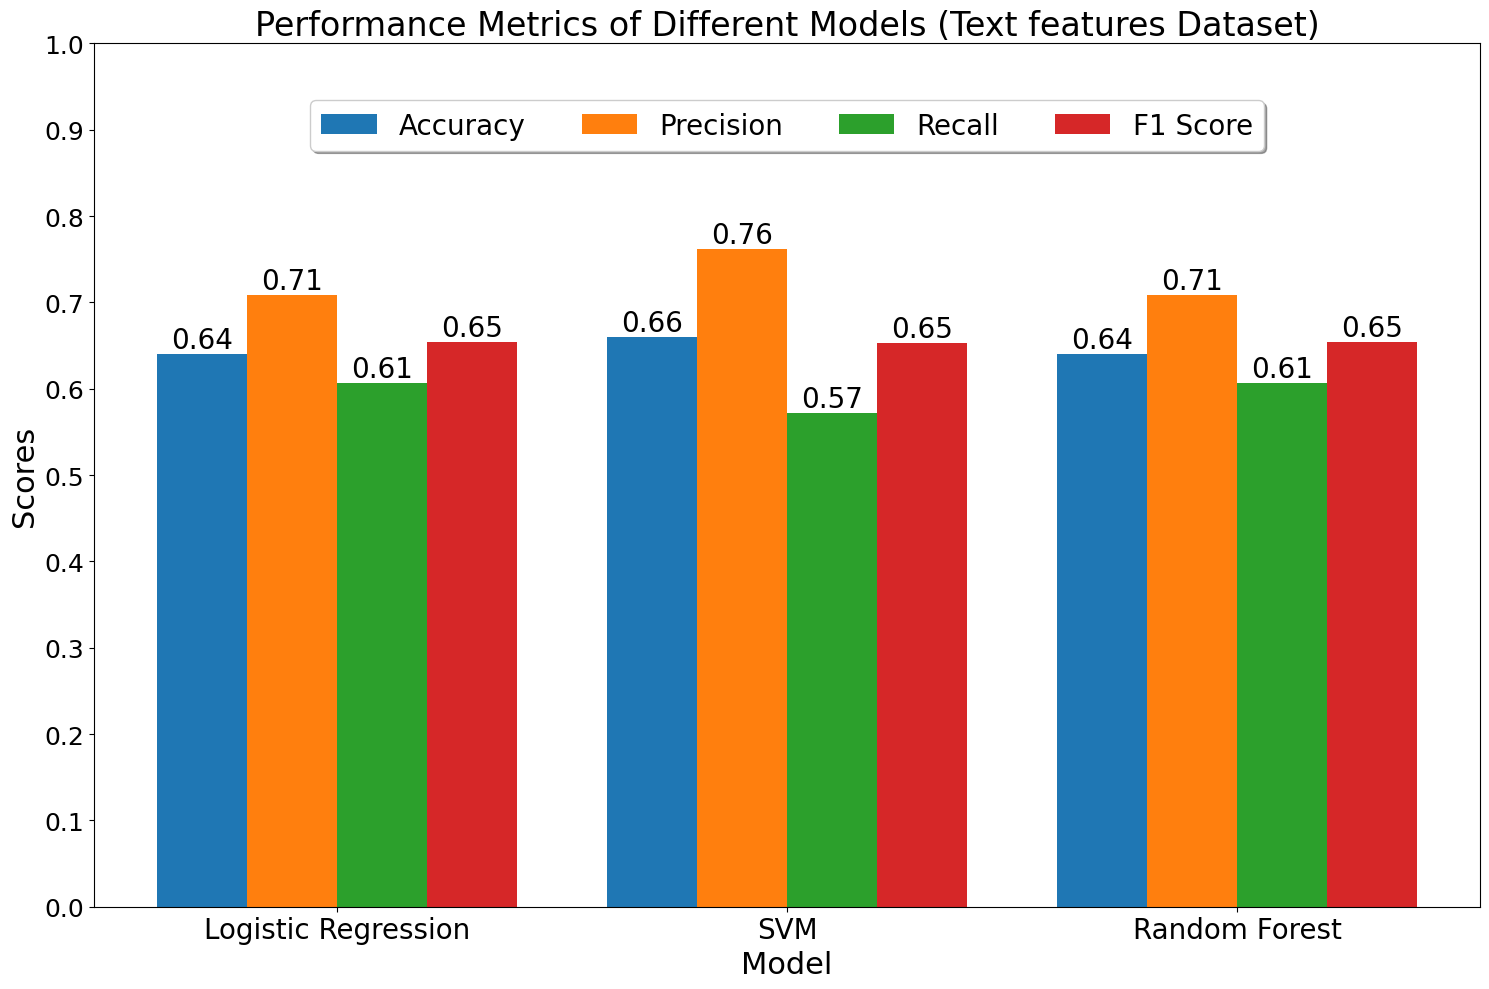

In [ ]:
models = ['Logistic Regression', 'SVM', 'Random Forest']

accuracy_scores = [accuracy_lr, svm_accuracy, rf_accuracy]
precision_scores = [precision_lr, precision_svm, precision_rf]
recall_scores = [recall_lr, recall_svm, recall_rf]
f1_scores = [f1_lr, f1_svm, f1_rf]

bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(15, 10))

bars1 = plt.bar(index - 1.5*bar_width, accuracy_scores, bar_width, label='Accuracy')
bars2 = plt.bar(index - 0.5*bar_width, precision_scores, bar_width, label='Precision')
bars3 = plt.bar(index + 0.5*bar_width, recall_scores, bar_width, label='Recall')
bars4 = plt.bar(index + 1.5*bar_width, f1_scores, bar_width, label='F1 Score')

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize = 20)

plt.xlabel('Model', fontsize = 22)
plt.ylabel('Scores', fontsize = 22)
plt.title('Performance Metrics of Different Models (Text features Dataset)', fontsize = 24)
plt.xticks(index, models, fontsize = 20)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), fancybox=True, shadow=True, ncol=4, fontsize=20)

plt.tight_layout()
plt.show()